# Polynomial Regression

What if your data doesn't look linear at all? Let's look at some more realistic-looking page speed / purchase data:

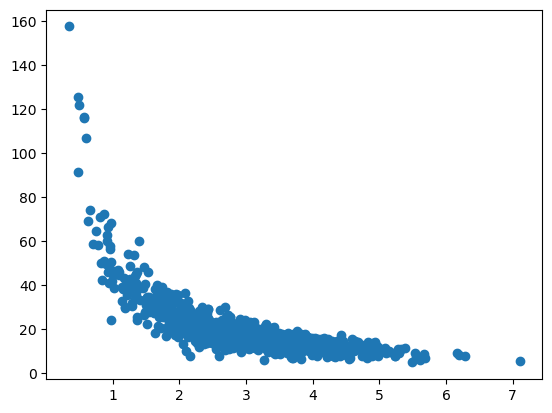

In [1]:
%matplotlib inline
from pylab import *
import numpy as np

np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

scatter(pageSpeeds, purchaseAmount)

numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [2]:
x = np.array(pageSpeeds)
y = np.array(purchaseAmount)

p4 = np.poly1d(np.polyfit(x, y, 4))


We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

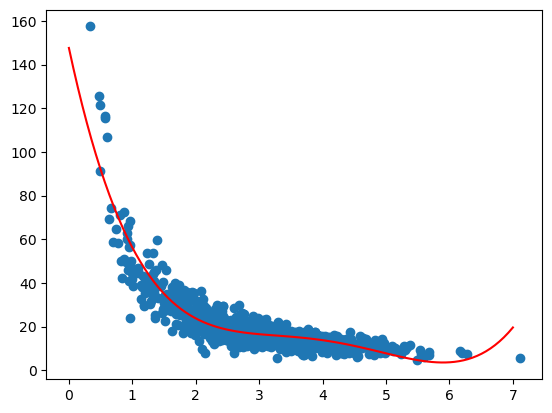

In [3]:
import matplotlib.pyplot as plt

xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

Looks pretty good! Let's measure the r-squared error:

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(y, p4(x))

print(r2)


0.8293766396303072


## Activity

Try different polynomial orders. Can you get a better fit with higher orders? Do you start to see overfitting, even though the r-squared score looks good for this particular data set?

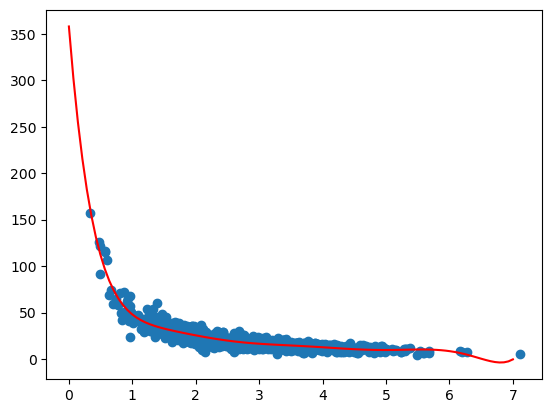

In [18]:
#Let's try the same polynomial regression, but with an order of 8
p8 = np.poly1d(np.polyfit(x, y, 8))
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p8(xp), c='r')
plt.show()

In [19]:
r2 = r2_score(y, p8(x))

print(r2)

0.8814395663681495


/Users/kalyannath/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


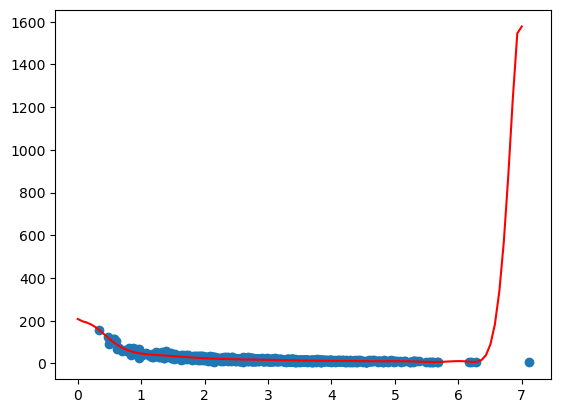

In [20]:
#We can see that the model is still a good fit for the data, no overfitting is occuring, and the r-squared value has
#increased. Now let's try the same polynomial regression with an even higher order of 20
p20 = np.poly1d(np.polyfit(x, y, 20))
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p20(xp), c='r')
plt.show()

In [21]:
r2 = r2_score(y, p20(x))

print(r2)

0.8849064371273864


In [ ]:
#We can see that the model is not a good fit for the data anymore due to the overfitting between 6 and 7 on the x-axis
#Although the r-squared value is still very high (0.88), this is no longer a good model for the data